## 3rd October 2023

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

# Power law Transformation

Text(0.5, 1.0, 'Output')

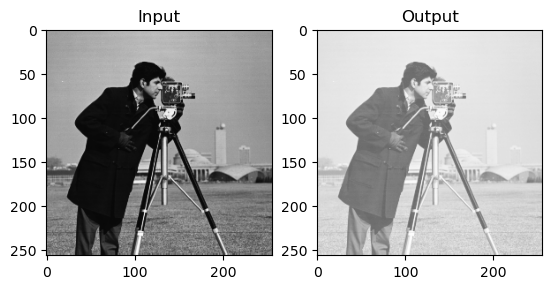

In [2]:
# Read image
img = cv2.imread('images/Fig0222(b)(cameraman).tif')

# PowerLaw Transform / Gamma Transform
img2 = img.copy()
gamma = 0.25
for row in range(img.shape[0]):
    for col in range(img.shape[1]):
        r = img[row,col,0]
        s = np.power(r/255.0,gamma)*255
        img2[row,col,0] = s
        img2[row,col,1] = s
        img2[row,col,2] = s
        
# Display
fig,ax = plt.subplots(1,2)
ax[0].imshow(img)
ax[0].set_title('Input')

ax[1].imshow(img2)
ax[1].set_title('Output')

(-0.5, 511.5, 511.5, -0.5)

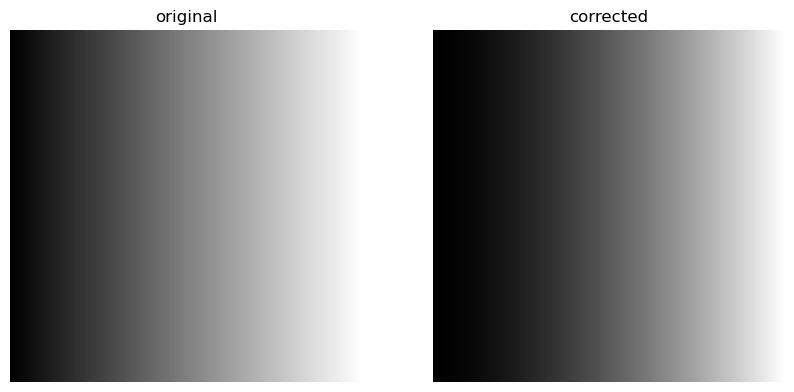

In [3]:
img = cv2.imread("images/gradient.tif", cv2.IMREAD_GRAYSCALE).astype(np.float64)

# oim = img**0.20
oim = img**1.5
fig = plt.figure(figsize= (10, 10))

fig.add_subplot(1, 2, 1) # 1 row and 2 column
plt.imshow(img, 'gray')
plt.title('original')
plt.axis('off')

fig.add_subplot(1, 2, 2)
plt.imshow(oim, 'gray')
plt.title('corrected')
plt.axis('off')

# cv2.imshow('Gradient: Original', img)
# cv2.imshow('Gradient: Gamma Corrected', oim)
# cv2.waitKey()
# cv2.destroyAllWindows()

(-0.5, 745.5, 975.5, -0.5)

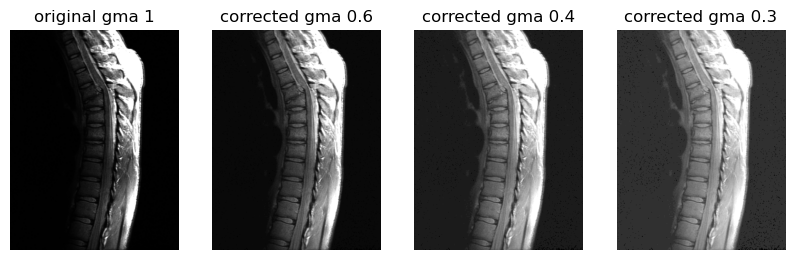

In [4]:
img = cv2.imread("images/spine.tif", cv2.IMREAD_GRAYSCALE).astype(np.float64)

# list for 
gmma = [1, 0.6, 0.4, 0.3]

oim = [img**gm for  gm in  gmma] #compressed form of for loop; 
fig = plt.figure(figsize= (10, 10))

fig.add_subplot(1, 4, 1)
plt.imshow(oim[0], 'gray')
plt.title('original gma 1')
plt.axis('off')

fig.add_subplot(1, 4, 2)
plt.imshow(oim[1], 'gray')
plt.title('corrected gma 0.6')
plt.axis('off')

fig.add_subplot(1, 4, 3)
plt.imshow(oim[2], 'gray')
plt.title('corrected gma 0.4')
plt.axis('off')

fig.add_subplot(1, 4, 4)
plt.imshow(oim[3], 'gray')
plt.title('corrected gma 0.3')
plt.axis('off')


# instead og that mysh code use loop

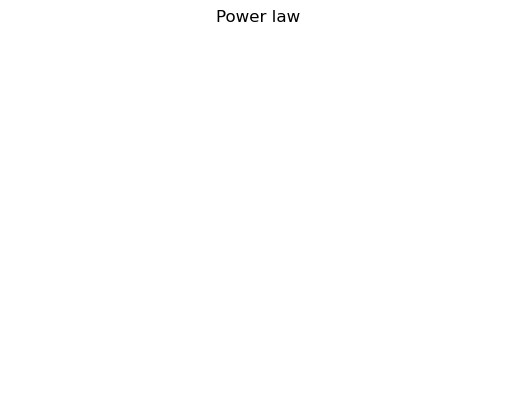

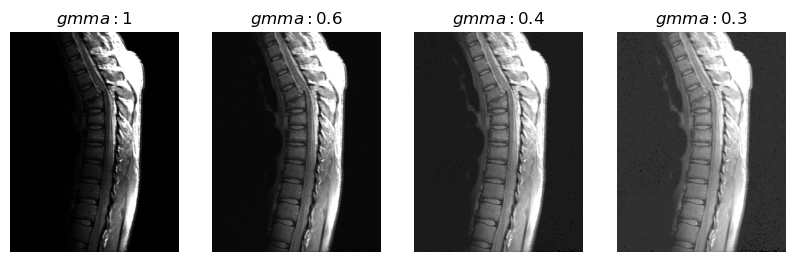

In [5]:
# instead of the above so much code you can use loop

gmma = [1, 0.6, 0.4, 0.3]

plt.title("Power law")
plt.axis('off')

fig = plt.figure(figsize= (10, 10))

fglst = fig.subplots(1,4)
for (i, fg) in enumerate(fglst.ravel()):
    fg.imshow(oim[i], 'gray')
    fg.set_title(f"$gmma: {gmma[i]}$")
    fg.set_axis_off()
plt.show()

In [6]:
img = cv2.imread("images/Fig0309(a)(washed_out_aerial_image).tif", cv2.IMREAD_GRAYSCALE).astype(np.float64)

# list for 
gmma = [1, 3.0, 4.0, 5.0]

oim = [img**gm for  gm in  gmma] #compressed form of for loop; 
fig = plt.figure(figsize= (10, 10))

fig.add_subplot(1, 4, 1)
plt.imshow(oim[0], 'gray')
plt.title('original gma 1')
plt.axis('off')

fig.add_subplot(1, 4, 2)
plt.imshow(oim[1], 'gray')
plt.title('corrected gma 3.0')
plt.axis('off')

fig.add_subplot(1, 4, 3)
plt.imshow(oim[2], 'gray')
plt.title('corrected gma 4.0')
plt.axis('off')

fig.add_subplot(1, 4, 4)
plt.imshow(oim[3], 'gray')
plt.title('corrected gma 5.0')
plt.axis('off')


(-0.5, 764.5, 768.5, -0.5)

## Piecewise-linear transformation

## Contrast stretching

In [7]:
# Load the image in grayscale
img = cv2.imread("images/p2.tif", cv2.IMREAD_GRAYSCALE).astype(np.float64)

# Define the parameters for contrast stretching
r1 = 96
r2 = 160
a1 = 0.4
a2 = 4.0
a3 = 7.0
s1 = 40
s2 = 220

# Create an output image with the same dimensions as the input
oim = np.zeros_like(img, dtype=np.float64)


# Apply contrast stretching with the new conditions
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        r = img[i, j]
        if r < r1:
            oim[i, j] = a1 * r
        elif r < r2:
            oim[i, j] = a2 * (r - r1) + s1
        else:
            oim[i, j] = a3 * (r - r2) + s2

# Scale the output image to the range [0, 255]
oim = np.clip(oim, 0, 255)
oim = oim.astype(np.uint8)

# Display the stretched image
cv2.imshow('Contrast Stretched Image', oim)
cv2.waitKey(0)
cv2.destroyAllWindows()

## Threshold

In [8]:
img = np.arange(1, 10001).reshape(100, 100)
imgout = np.where(img>255, 127, img)

In [9]:
def show(img, title=None):
    plt.imshow(img, 'gray')
    plt.title(title)
    plt.axis()
    plt.show()

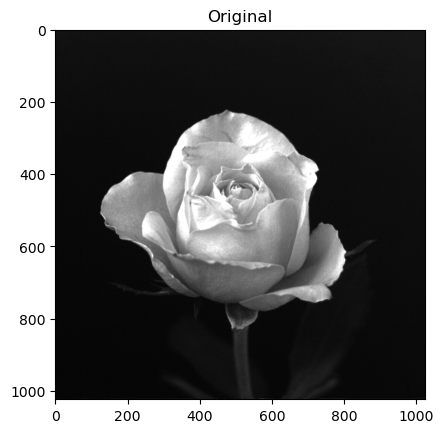

In [11]:
img = cv2.imread('images/rose.tif', 0)
show(img, 'Original')
thresholedImage = np.zeros((img.shape[0], img.shape[1]))

t = 100
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        if img[i,j]>t:
            thresholedImage[i,j] = 255
        else:
            thresholedImage[i,j] = 0
            
            
            
            
show(thresholedImage, 'Binary Image')

In [12]:
np.unique(img, return_counts=True)

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  19,  20,  21,  23,  24,  25,  28,  30,
         32,  33,  34,  36,  38,  40,  42,  44,  47,  49,  50,  53,  55,
         56,  58,  60,  62,  63,  65,  66,  68,  70,  73,  75,  76,  78,
         79,  80,  82,  86,  88,  89,  91,  92,  94,  97, 100, 102, 104,
        106, 107, 110, 112, 116, 117, 119, 122, 123, 125, 128, 132, 133,
        136, 138, 141, 144, 148, 149, 152, 154, 156, 158, 160, 165, 167,
        170, 172, 174, 177, 178, 181, 184, 188, 191, 193, 196, 197, 200,
        203, 205, 208, 211, 214, 216, 219, 222, 227, 228, 232, 235, 236,
        240, 243, 245, 248, 250, 253, 255], dtype=uint8),
 array([   13,     3,    49,   891,  6190, 19586, 19504, 48120, 75408,
        38868, 73604, 30966, 54158, 46958, 96990, 54822, 49778, 71683,
        25623, 19486, 30895,  8982,  4556,  7405,  4062,  2932,  1319,
         1286,  2357,  1300,  1191,  1913,  1173,  2570,   827,   675,
 

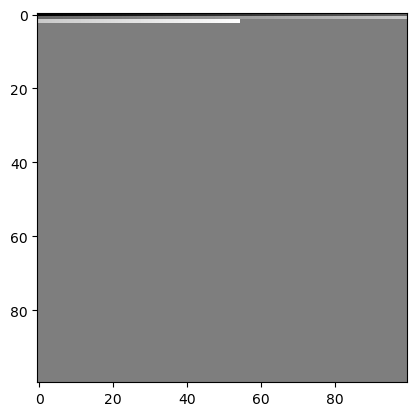

In [13]:
show(img=imgout)

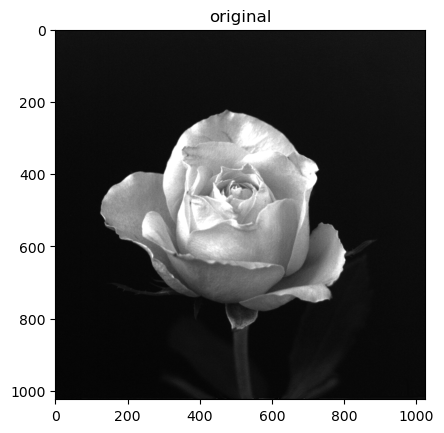

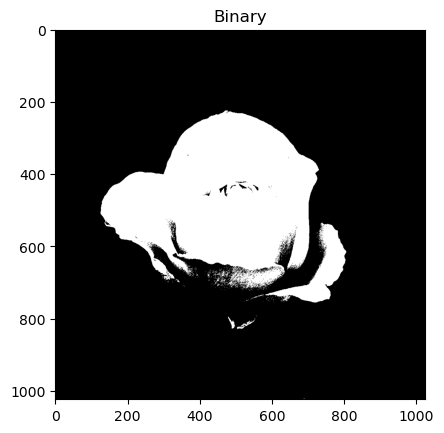

In [14]:
img = cv2.imread('images/rose.tif', 0)
show(img, 'original')
t = 100
thresholedImage = np.where(img>t, 255, 0)
show(thresholedImage, 'Binary')